A circle of fixed or a given potential present in the space

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import cm
import numba
from numba import jit

In [15]:
edge = np.linspace(-1 , 1 , 300)

In [16]:
xv , yv = np.meshgrid(edge , edge)

In [17]:
def potential_block(x,y):
    return np.select([ (x)**2 + (y)**2 <= 0.15 , (x)**2 + (y)**2 > 0.15 ] , [1 , 0 ] )

In [18]:
fixed = potential_block(xv,yv)
fixed_bool = fixed != 0
fixed_bool

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Modify the compute potential function so that it does not set to modify the points inside the box

In [6]:
@numba.jit("f8[:,:](f8[:,:], b1[:,:], i8)", nopython = True, nogil=True)
def compute_potential(potential , fixed_bool , n_iter):
    length = len(potential[0])  # potential[0] == potential[0,:]  
    for n in range(n_iter):
        for i in range(1, length-1):
            for j in range(1 , length-1):
                if not(fixed_bool[j,i]):
                    potential[j , i ] = (1/4)*(potential[j,i+1] + potential[j,i-1] + potential[j+1,i] + potential[j-1,i])
    return potential

In [7]:
upper_y = np.cos(np.pi*edge/2)
lower_y = edge**4
upper_x = 1/(np.e**(-1) - np.e) * (np.exp(edge) - np.e)
lower_x = 0.5*(edge**2 - edge)

In [8]:
potential = np.zeros((300,300))
potential[:,-1] = upper_x
potential[:, 0] = lower_x
potential[-1,:] = upper_y
potential[fixed_bool] = fixed[fixed_bool]
potential[0 ,:] = lower_y

In [9]:
compute_potential(potential, fixed_bool , n_iter = 10000)

array([[ 1.00000000e+00,  9.73511405e-01,  9.47552563e-01, ...,
         9.47552563e-01,  9.73511405e-01,  1.00000000e+00],
       [ 9.89988926e-01,  9.65046736e-01,  9.40343640e-01, ...,
         9.48908209e-01,  9.73796374e-01,  9.98949550e-01],
       [ 9.80022595e-01,  9.56342982e-01,  9.32787642e-01, ...,
         9.49901087e-01,  9.73816338e-01,  9.97892050e-01],
       ...,
       [-6.59947875e-03,  4.04310313e-03,  1.46533439e-02, ...,
         3.54743306e-02,  2.54044086e-02,  1.53687775e-02],
       [-3.32211049e-03,  7.26319471e-03,  1.78249856e-02, ...,
         2.82499002e-02,  1.79678008e-02,  7.71008897e-03],
       [ 6.12323400e-17,  1.05068055e-02,  2.10124511e-02, ...,
         2.10124511e-02,  1.05068055e-02,  6.12323400e-17]])

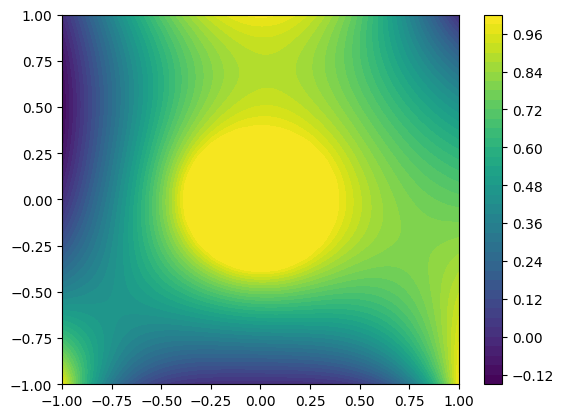

In [10]:
plt.contourf(xv ,yv , potential , 40)
plt.colorbar()

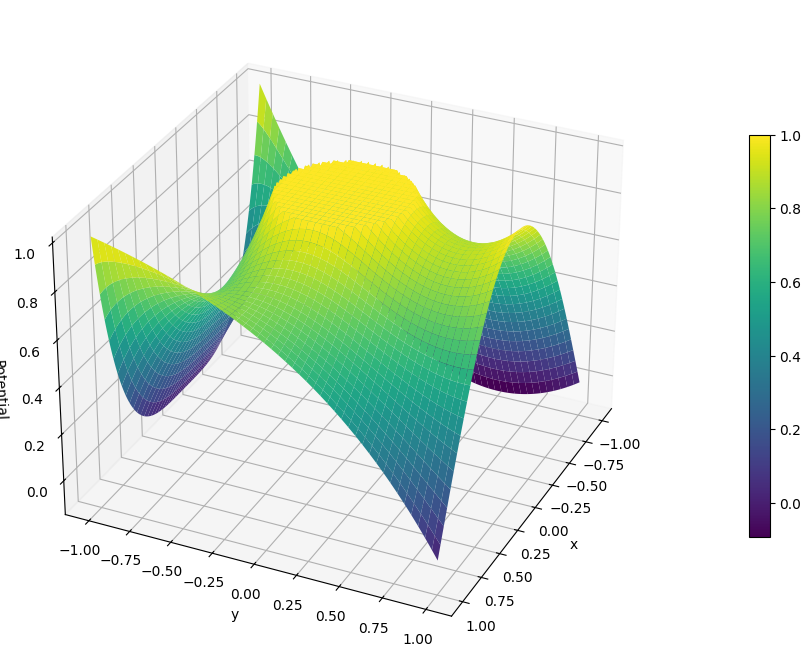

In [11]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(
    xv, yv, potential,
    cmap='viridis',
    linewidth=0,
    antialiased=True
)

fig.colorbar(surf, ax=ax, shrink=0.6, pad=0.1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential')

ax.view_init(elev=30, azim=25)  # good viewing angle

plt.tight_layout()
# plt.savefig("potential_of_a_circle.png")
plt.show()

In [12]:
Ex, Ey = np.gradient(-potential)
E_mag = np.sqrt(Ex**2 + Ey**2)

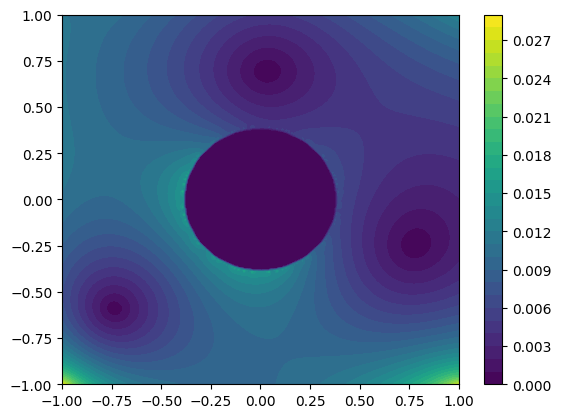

In [13]:
plt.contourf( xv , yv , E_mag , 30)
plt.colorbar()